In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [2]:
boston = pd.read_csv('Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# sklearn module imports
import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [8]:
# estimating Sales ~ TV + Radio + Newspaper model
m_reg=sklm.LinearRegression() 

X_m = boston[['crim','chas', 'rm']]
Y_m = boston.medv

# let's split the dataset to training and test sets
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.6, random_state=42)

m_reg.fit(X_train_m, Y_train_m)

LinearRegression()

In [9]:
# let's split the dataset to training and test sets
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_train_m, Y_train_m, test_size=0.2, random_state=42)

m_reg.fit(X_train_m, Y_train_m)

LinearRegression()

In [10]:
#Get the parameters from the fitting
print('Intercept:', m_reg.intercept_)

coeff_df = pd.DataFrame(m_reg.coef_, X_m.columns, columns=['Coefficient'])
coeff_df

Intercept: -27.813921943487273


,Coefficient
crim,-0.341551
chas,3.335601
rm,8.141774


In [11]:
# making predictions
Y_predict_m = m_reg.predict(X_test_m)

# compare actual values with the predicted
df_m = pd.DataFrame({'Actual': Y_test_m, 'Predicted': Y_predict_m})
df_m

,Actual,Predicted
439,12.8,14.792462
415,7.2,18.393440
12,21.7,20.100954
502,20.6,21.998273
372,50.0,20.530914
309,20.3,20.689414
451,15.2,24.511157
276,33.2,34.652193
187,32.0,27.376692
440,10.5,12.023346


In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_m, Y_predict_m))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test_m, Y_predict_m))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_m, Y_predict_m)))
print("R-Squared:", metrics.r2_score(Y_test_m, Y_predict_m))

Mean Absolute Error: 4.767357478747986
Mean Squared Error (MSE): 50.20107283228088
Root Mean Squared Error: 7.08527154259319
R-Squared: 0.5616028155798577


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# 1

In [14]:
formula='medv ~ crim + chas + rm'
model = smf.ols(formula, data=boston) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.73e-87
Time:                        19:10:57   Log-Likelihood:                -1636.7
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     502   BIC:                             3298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8107      2.563    -11.240      0.000     -33.847     -23.775
crim          -0.2607      0.033     -7.964      0.000      -0.325      -0.196
chas           3.7630      1.086      3.464      0.001       1.629       5.897
rm             8.2782      0.402     20.602      0.000       7.489       9.068
==============================================================================
Omnibus:                      157.437   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.666
Skew:                           1.216   Prob(JB):                    7.38e-206
Kurtosis:                       9.236   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2:
# -0.2607*0.1 + 3.763*0 + 8.2782*6 - 28.8107 = 20.4978 or 20,497.8

In [15]:
#Exploring Interactions:
formula='medv ~ crim + chas + rm + crim*chas'
model = smf.ols(formula, data=boston) 
i_reg = model.fit()
i_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     158.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.10e-87
Time:                        19:11:34   Log-Likelihood:                -1633.0
No. Observations:                 506   AIC:                             3276.
Df Residuals:                     501   BIC:                             3297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8140      2.547    -11.312      0.000     -33.818     -23.810
crim          -0.2672      0.033     -8.191      0.000      -0.331      -0.203
chas           1.6220      1.336      1.214      0.225      -1.003       4.247
rm             8.2826      0.399     20.743      0.000       7.498       9.067
crim:chas      1.1491      0.423      2.718      0.007       0.318       1.980
==============================================================================
Omnibus:                      133.717   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.593
Skew:                           1.003   Prob(JB):                    1.93e-175
Kurtosis:                       8.843   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
boston.corr() #correlation matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


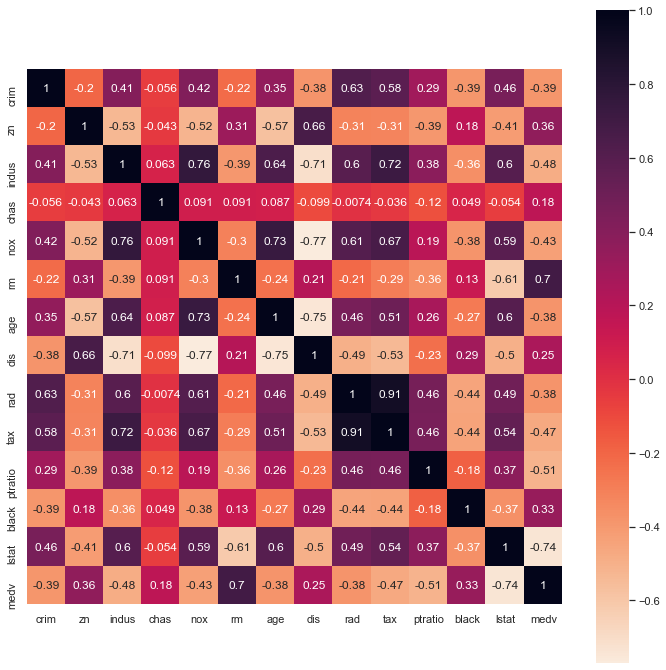

In [22]:
# 4 Draw a correlation heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
corrmat = boston.corr()
sns.heatmap(corrmat, square = True, cmap="rocket_r",annot=True);

In [ ]:
# 3
# I would say that according to the heat map, industry & nitric oxide concentration, industry & tax, nitric oxide 
# concentration & age, room & Median value, and accessabilty to radial highways & tax all have a relationship above or 
# equal to 0.7. Industry(factories) might be a cause of nitric oxide, industry would increase tax because of the 
# availability of jobs. Nitric oxide concentration and tax have a relationship of 0.67 meaning that higher nitric oxide
# concentration would cause higher tax because of its connection to industry

In [ ]:
# 4 
# I would remove chas, age, rad, black because of how low the value is with medv.

In [23]:
# 5
formula='medv ~ rm + indus + tax + ptratio + lstat'
model = smf.ols(formula, data=boston) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     212.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.37e-121
Time:                        19:38:44   Log-Likelihood:                -1551.6
No. Observations:                 506   AIC:                             3115.
Df Residuals:                     500   BIC:                             3141.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5177      3.975      4.407      0.000       9.708      25.327
rm             4.6252      0.431     10.740      0.000       3.779       5.471
indus          0.0570      0.053      1.081      0.280      -0.047       0.161
tax           -0.0035      0.002     -1.662      0.097      -0.008       0.001
ptratio       -0.8762      0.125     -6.988      0.000      -1.122      -0.630
lstat         -0.5590      0.049    -11.444      0.000      -0.655      -0.463
==============================================================================
Omnibus:                      218.718   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.229
Skew:                           1.824   Prob(JB):                    1.97e-267
Kurtosis:                       9.704   Cond. No.                     7.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
formula='medv ~ rm + ptratio + lstat'
model = smf.ols(formula, data=boston) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.69e-123
Time:                        19:42:49   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
rm             4.5154      0.426     10.603      0.000       3.679       5.352
ptratio       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
lstat         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

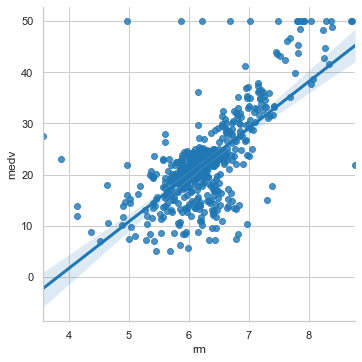

In [24]:
sns.lmplot(x = "rm", y = "medv", data = boston, order=1, ci=95);

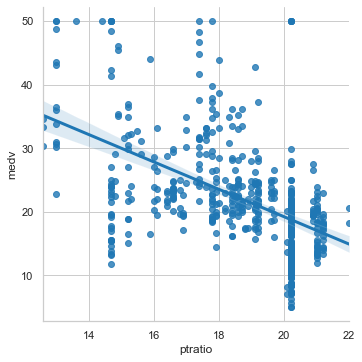

In [25]:
sns.lmplot(x = "ptratio", y = "medv", data = boston, order=1, ci=95);

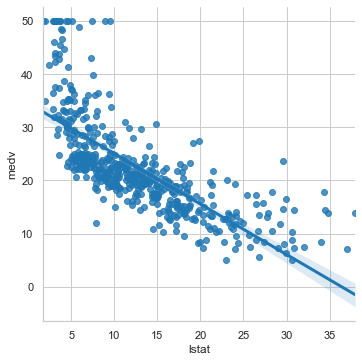

In [26]:
sns.lmplot(x = "lstat", y = "medv", data = boston, order=1, ci=95);

In [28]:
formula='medv ~ rm+ crim + zn + indus + chas + nox + age + dis + rad + tax + black + ptratio + lstat'
model = smf.ols(formula, data=boston) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        19:44:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
rm             3.8099      0.418      9.116      0.000       2.989       4.631
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
black          0.0093      0.003      3.467      0.001       0.004       0.015
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 6
# The last regression (above) has the best r^2 and the best Durbin-Watson of all of the models.

In [ ]:
# 7
# rm, crim, zn, chas, nox, dis, rad, tax, black, ptratio, and lstat are all significant factors when it come to calculating
# the value of a home in Boston